<a href="https://colab.research.google.com/github/RupeshSharma14/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Introduction</b> 

### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

### <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

### <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [53]:
!pip install matplotlib --upgrade

In [55]:
!pip install geopandas

In [54]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

In [56]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (11, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [57]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Loading the csv file into pandas dataframe

path_r = "/content/drive/MyDrive/EDA - Capstone Project/Airbnb NYC 2019.csv"
path_n = "/content/drive/MyDrive/DATA_FILES/Airbnb_NYC_2019.csv"
airbnb_df = pd.read_csv(path_r)

In [59]:
# Displaying the dataframe

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [60]:
# Checking the size of dataset

airbnb_df.shape

(48895, 16)

**The dataset contains 48895 observations and 16 features.**

In [61]:
# Checking the basic information about the dataframe

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**The dataset contains a mix of numerical and categorical features.**

**The dataset contain NULL values in "id","name","last_review" and "reviews_per_month" columns.**

In [62]:
# Counting the number of null values in "name", "host_name", "number_of_reviews" and "last_review" columns

nan_values_cols = ["name", "host_name", "reviews_per_month", "last_review"]
airbnb_df[nan_values_cols].isna().sum()

name                    16
host_name               21
reviews_per_month    10052
last_review          10052
dtype: int64

In [63]:
# Handling the Nan values

airbnb_df.dropna(subset = ["name", "host_name"], inplace = True)        # Dropping the rows having NULL values in "name", "host_name" column

airbnb_df["reviews_per_month"].fillna(0.0, inplace = True)              # Filling NULL values of "reviews_per_month" with 0.0

airbnb_df.drop(labels = "last_review", axis = 1, inplace = True)        # Dropping "last_review" column

In [64]:
# Descriptive summary of numerical attributes

airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**The minimum price of a listing is mentioned 0 here but Airbnb starts the listing price with a minimum of $10.**

**Minimum availability of a listing is 0 it may be due to following possibilities:**

> **1. May be the listing is booked for a year by the guest.**

> **2. There might be a chance of bad entry.**

**The descriptive summary also tells us ouliers are present in the data.**

In [65]:
# Changing the minimum price to $10

airbnb_df["price"] = np.where(airbnb_df["price"] < 10, 10, airbnb_df["price"])

In [66]:
# Creating a new column "price_category"

airbnb_df["price_category"] = pd.cut(airbnb_df["price"], bins = [10, 100, 200, 10000], include_lowest = True, labels = ["low", "mid", "high"])

In [67]:
# Displaying the final dataframe after data preparation

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,mid
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,high
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,mid
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,low


## <b>Data Exploration and Visualization</b>

**Lets start our data exploration journey by counting the number of listings present in our dataset.**

In [68]:
# Number of listings present in the dataset

num_listings = airbnb_df["id"].count()
num_listings

48858

> **There are 48,858 listings present in the dataset.**



**Lets try to visualize these listings in New York City map and draw some insights from it.**

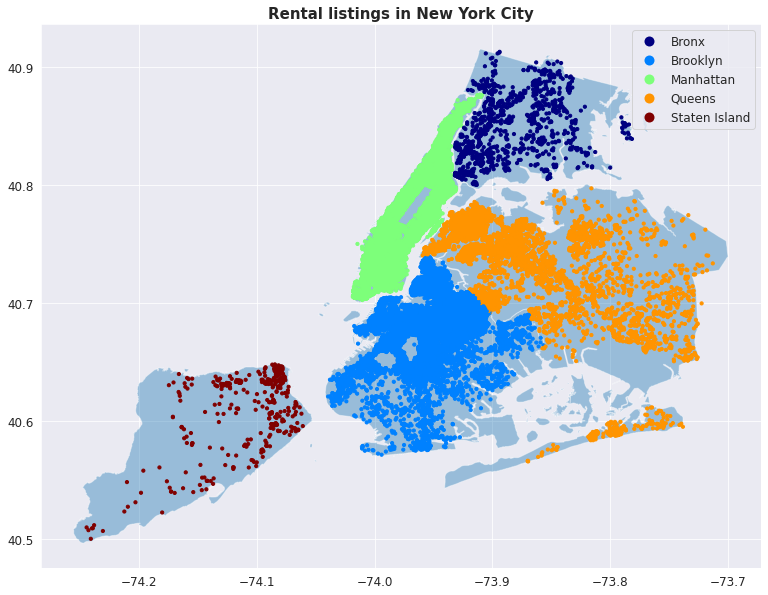

In [69]:
import geopandas as gpd
from shapely.geometry import Point, Polygon


gdp_path_r ="/content/drive/MyDrive/EDA - Capstone Project/Borough Boundaries/geo_export_0c550535-4d21-4555-aa94-73550209bb00.shp"
gdp_path_n = "/content/drive/MyDrive/DATA_FILES/geopandas_file+/geo_export_0c550535-4d21-4555-aa94-73550209bb00.shp"

# loading the New York city map
street_map = gpd.read_file(gdp_path_r)

# Zip x and y coordinates
geometry = [Point(xy) for xy in zip(airbnb_df["longitude"], airbnb_df["latitude"])]

# Creating Geopandas dataframe
geo_df = gpd.GeoDataFrame(airbnb_df, geometry = geometry)

# Creating figure and axes, assign to subplot
fig, ax = plt.subplots(figsize = (15, 10))

# Add .shp mapfile to axes
street_map.plot(ax = ax, alpha = 0.4)
geo_df.plot(column = "neighbourhood_group", ax = ax, legend = True, markersize = 10, cmap = "jet")

# Adding title to graph
plt.title("Rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()



> **From the map, we can see that there are listings from moslty parts of Manhattan followed by Brooklyn.**


> **Staten Island has the least number of listings.**




**Now lets try to find the exact count of listings present in each neighbourhood group.**

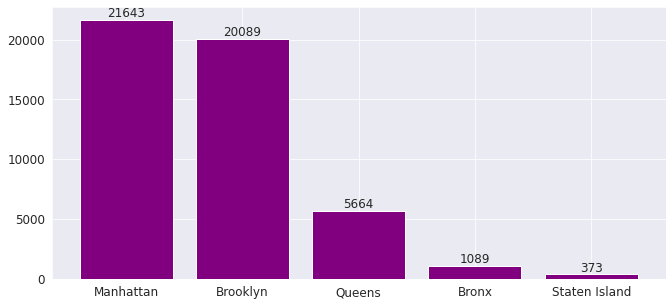

In [70]:
# Number of listings present in each neighbourhood_group

num_listings_neighbourhood_group = airbnb_df["neighbourhood_group"].value_counts()
neighbourhood_grp_barplot = plt.bar(x = num_listings_neighbourhood_group.index, height = num_listings_neighbourhood_group.values, color = "purple")
plt.bar_label(neighbourhood_grp_barplot)

plt.show()



> **Now its quite clear AIRBNB has a widespread business across Manhattan and Brooklyn as most number of listings in New York City are from here.**



**Most number of listings are from Manhattan followed by Brooklyn but what about the prices of these listings? Are these listings prices cheap or costlier as compared to other locations? Lets dig it out.**

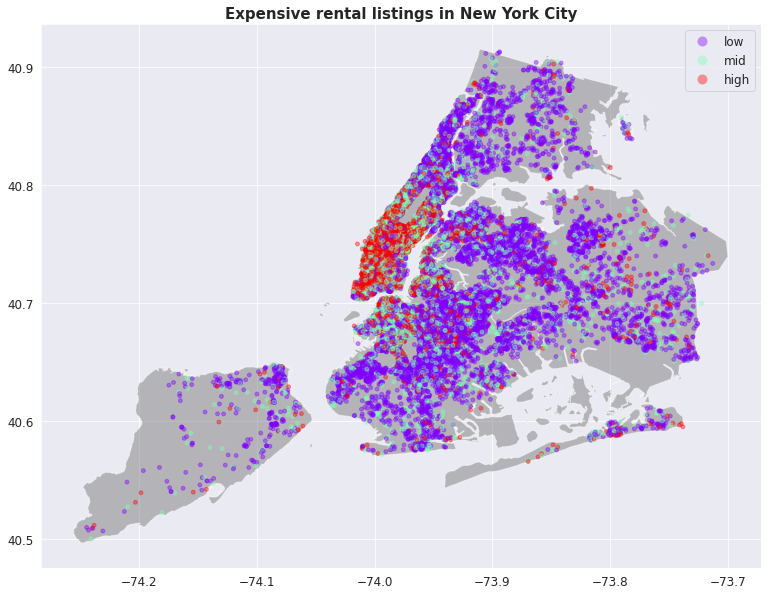

In [71]:
fig, ax = plt.subplots(figsize = (15, 10))
street_map.plot(ax = ax, alpha = 0.5, color = "grey")
geo_df.plot(column = "price_category", alpha = 0.4, ax = ax, legend = True, markersize = 15, cmap = "rainbow")
plt.title("Expensive rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()



> **Its clearly visible, Manhattan has the most number of expensive listings. It means that Manhattan is the most profitable location both for the AIRBNB and its hosts.**



**But what makes Manhattan such an expensive location of New York City? The answers lies in the fact that Manhattan is the cultural, administrative, financial centre of New York City and is headquater of major MNCs and important universities. Its also the home to the world's two largest stock exchanges by total market capitalization: the New York Stock Exchange and NASDAQ which raises the bar of cost of living in Manhattan.**

**Before moving forward lets check out the median price of listings in each neighourhood_group.**

In [72]:
groupby_price = airbnb_df.groupby("neighbourhood_group")
groupby_price["price"].median().to_frame()

,price
neighbourhood_group,
Bronx,65
Brooklyn,90
Manhattan,150
Queens,75
Staten Island,75




> **Median price of a listing in Manhattan is $150 and there is a huge gap in the median price of Manhattan as compared to other neighbourhood groups.**



**Lets move forward and gain insights from another feature variables.Lets talk about types of rooms provided by AIRBNB host in New York City.**

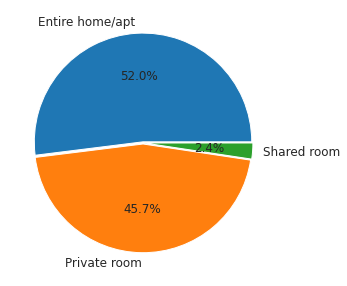

In [73]:
# Type of room space airbnb host provides

plt.pie(airbnb_df['room_type'].value_counts(), labels = ['Entire home/apt', 'Private room', 'Shared room'], autopct='%1.1f%%', explode = [0.01, 0.01, 0.01]);

> **Most of the AIRBNB hosts present in New York City rents there Entire home/apartment and Private room.**

> **Shared rooms are rarely rented by hosts.**







**Now lets try to visualize with the help of bar plot which type of room is mostly listed in different neighbourhood group.**

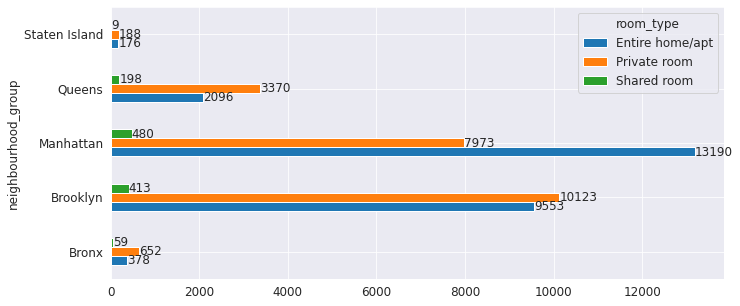

In [90]:
# Type of room space airbnb host provides in each borough

neighbourhood_group_room_crosstab =  pd.crosstab(index = airbnb_df["neighbourhood_group"], columns = airbnb_df["room_type"])
cross_tab = neighbourhood_group_room_crosstab.plot(kind = "barh")

# Adding annotations
for container in cross_tab.containers:
  cross_tab.bar_label(container, label_type = "edge")

> **It seems like half the listings renting out Entire house and apartments are from Manhattan only.**


> **Private rooms are mostly rented out in all neighbourhood group except in Manhattan.**

**Now the question arises what is the price of different room types in different neighbourhood group? Lets find it out by calculating the median price for every room type in different neighbourhood group.**

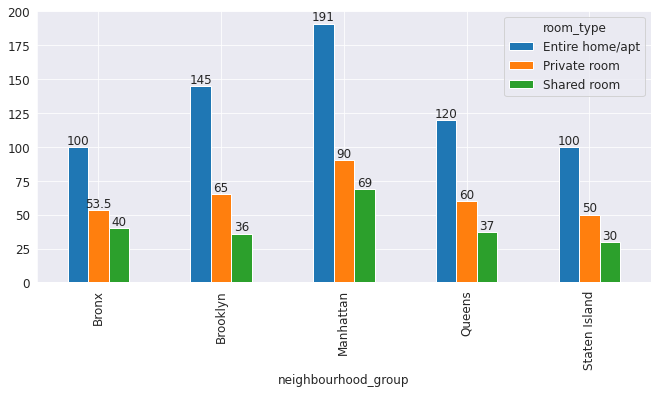

In [92]:
# Median price of room in every borough for each room type

neighbourhood_group_room_price_pivot = pd.pivot_table(data = airbnb_df, values = "price",index = "neighbourhood_group", columns = "room_type", aggfunc = np.median)
pivot_table = neighbourhood_group_room_price_pivot.plot(kind = "bar")

# Adding annotations
for container in pivot_table.containers:
  pivot_table.bar_label(container, label_type = "edge")

> **Entire houses and apartment are expensive in every neighbourhood group.**

> **Brooklyn and Queens have similar price range for Private and Shared rooms.**

> **Bronx and Staten Island have similar type of price range for each room type.**





**Now lets move forward and extract information about most reviewed hosts.**

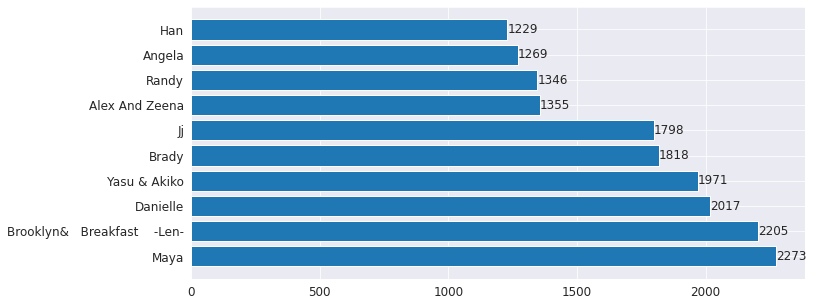

In [113]:
# 10 most reviewed host

most_reviewed_host = airbnb_df.groupby(['host_id', "host_name", "neighbourhood"])['number_of_reviews'].sum().sort_values(ascending=False).reset_index().head(10)
bar = plt.barh(width = "number_of_reviews", y = "host_name", data = most_reviewed_host)
plt.bar_label(bar, label_type = "edge")

plt.show()



> **Maya is the most reviewed host with 2273 reviews.**



**We don't have sufficient information to know whether these are positive or negative reviews, we can consider these host as popular.Now we will calculate the average price at which these popular host rent their properties to their guests.**

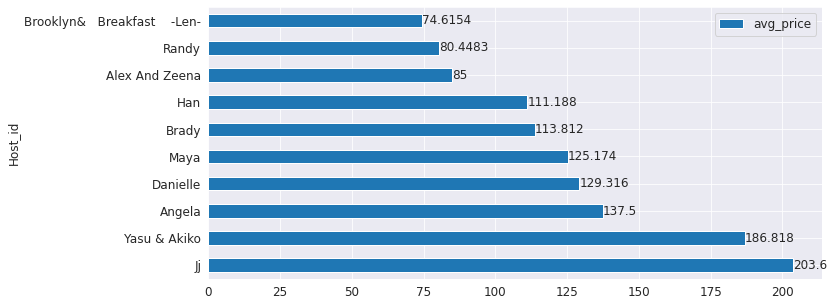

In [111]:
#Avg price of listings of most reviewed host

l = most_reviewed_host.host_name.to_list() 
top_host_dict = {}
for elem in  l:
  avg_price=airbnb_df[airbnb_df['host_name']==elem].price.mean()
  top_host_dict[elem]=avg_price

top_host_avg_price_df=pd.DataFrame(top_host_dict.items(), columns=['Host_id', 'avg_price'])
top_host_avg_price_df.set_index('Host_id', inplace=True)
a = top_host_avg_price_df.sort_values(by = "avg_price",ascending=False).reset_index().plot(x = "Host_id",y = "avg_price",kind = "barh")

for container in a.containers:
  plt.bar_label(container)

> **Among the most reviewed host JJ has the most expensive listings.**



**We can also calculate the most reviewed neighbourhood of New York City.**



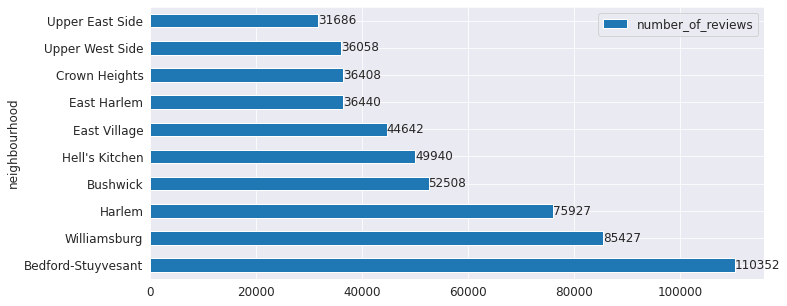

In [143]:
# Most reviewed neighbourhood

busiest_host_reviews = airbnb_df.groupby(["neighbourhood"])['number_of_reviews'].sum().sort_values(ascending = False).reset_index().head(10)
b = busiest_host_reviews.plot(x = "neighbourhood",y = "number_of_reviews",kind = "barh")

for i in b.containers:
  plt.bar_label(i)



> **Bedford-Stuyvesant is the most reviewed neighbouhood followed by Williamsburg.**



**We will also calculate the most expensive neighbourhood of New York City.**

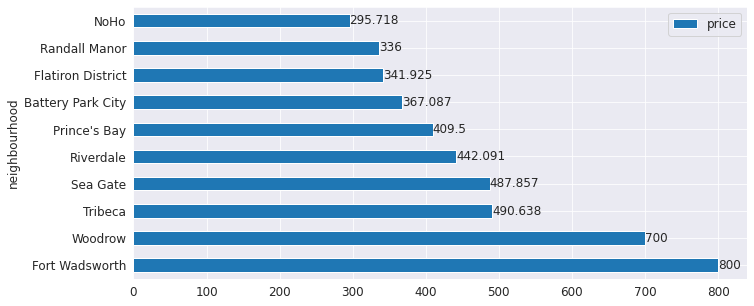

In [150]:
# expensive neighbourhood

busiest_host_reviews = airbnb_df.groupby(["neighbourhood"])['price'].mean().sort_values(ascending = False).reset_index().head(10)
b = busiest_host_reviews.plot(x = "neighbourhood",y = "price",kind = "barh")

for i in b.containers:
  plt.bar_label(i)



> **Fort Wadsworth is most expensive neighbourhood in the New York City.**



**Now we will be moving to availabilty of the listings. We will now visualize the availability of listings in different neighbourhood group.**

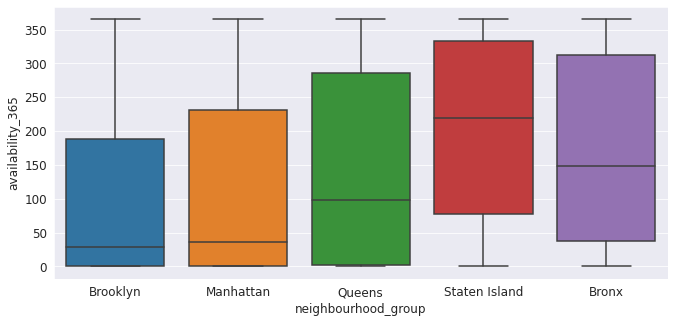

In [141]:
sns.boxplot(x = "neighbourhood_group", y = "availability_365", data = airbnb_df)
plt.show()



> **Mostly bookings are opened in Staten Island followed by Bronx.**


> **Only few bookings are opened in Brooklyn and Manhattan.**





**Finally lets draw a correlation matrix to check whether there is any correlation between variables.**

Text(0.5, 1.0, 'Correlation among Variables')

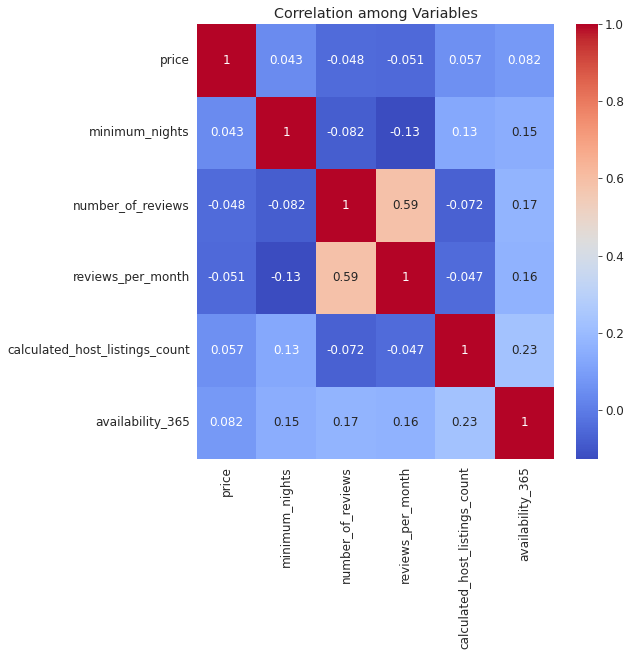

In [151]:
col_to_check = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']
corr = airbnb_df[col_to_check].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap="coolwarm").set_title("Correlation among Variables")



> **There is a correlation between "number_of_reviews" and "reviews_per_month".**



**Now lets draw the inferences and conclusion from this dataset:**
